+-------------+--------------+------------+
| Method      |   Iterations |       Root |
+=============+==============+============+
| Bisection   |           18 |  1.30893   |
+-------------+--------------+------------+
| Fixed Point |           19 | -0.0512236 |
+-------------+--------------+------------+
| Aitken      |            5 |  1.30892   |
+-------------+--------------+------------+
| Steffensen  |            5 |  1.30892   |
+-------------+--------------+------------+
| Newton      |            5 |  1.30892   |
+-------------+--------------+------------+
| Secant      |            7 |  1.30892   |
+-------------+--------------+------------+


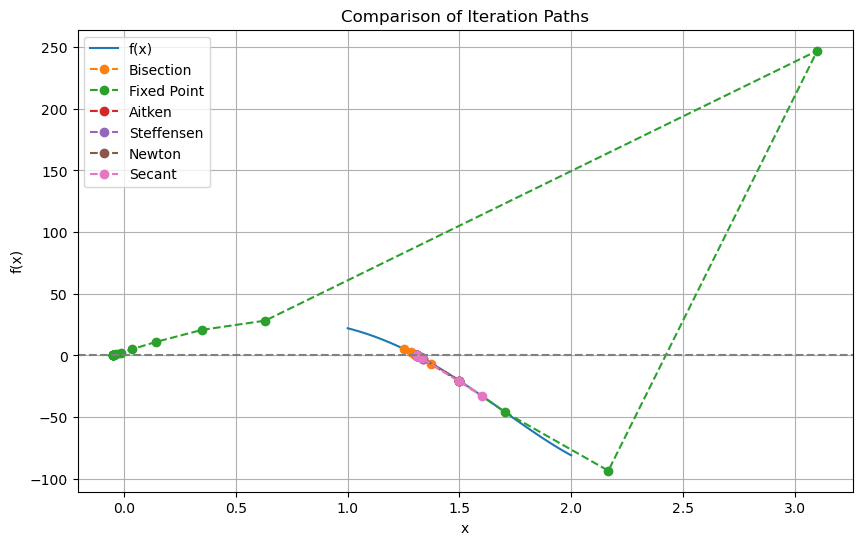

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# 定义方程和导数
def f(x):
    return 7*x**5 -13*x**4 -21*x**3 -12*x**2 +58*x +3

def df(x):
    return 35*x**4 -52*x**3 -63*x**2 -24*x +58

# 二分法
def bisection(f, a, b, eps=1e-5, max_iter=1000):
    history = []
    if f(a) * f(b) >= 0:
        return None, history
    for _ in range(max_iter):
        c = (a + b) / 2
        history.append(c)
        if abs(a - b) < eps:
            break
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return c, history

# 不动点迭代法 (g(x) = x - f(x)/100)
def fixed_point(f, x0, eps=1e-5, max_iter=1000):
    history = [x0]
    for _ in range(max_iter):
        x_next = x0 - f(x0)/100  # 自定义 g(x)
        history.append(x_next)
        if abs(x_next - x0) < eps:
            break
        x0 = x_next
    return x_next, history

# Aitken 加速
def aitken(f, x0, eps=1e-5, max_iter=1000):
    history = [x0]
    for _ in range(max_iter):
        x1 = x0 - f(x0)/100
        x2 = x1 - f(x1)/100
        x_hat = x0 - (x1 - x0)**2 / (x2 - 2*x1 + x0)
        history.append(x_hat)
        if abs(x_hat - x0) < eps:
            break
        x0 = x_hat
    return x_hat, history

# Steffensen 加速
def steffensen(f, x0, eps=1e-5, max_iter=1000):
    history = [x0]
    for _ in range(max_iter):
        x1 = x0 - f(x0)/100
        x2 = x1 - f(x1)/100
        denominator = x2 - 2*x1 + x0
        if denominator == 0:
            break
        x_new = x0 - (x1 - x0)**2 / denominator
        history.append(x_new)
        if abs(x_new - x0) < eps:
            break
        x0 = x_new
    return x_new, history

# 牛顿法
def newton(f, df, x0, eps=1e-5, max_iter=1000):
    history = [x0]
    for _ in range(max_iter):
        x_next = x0 - f(x0)/df(x0)
        history.append(x_next)
        if abs(x_next - x0) < eps:
            break
        x0 = x_next
    return x_next, history

# 弦截法
def secant(f, x0, x1, eps=1e-5, max_iter=1000):
    history = [x0, x1]
    for _ in range(max_iter):
        x2 = x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0))
        history.append(x2)
        if abs(x2 - x1) < eps:
            break
        x0, x1 = x1, x2
    return x2, history

# 参数设置
epsilon = 1e-5
x0 = 1.5

# 求解各方法
methods = {
    "Bisection": bisection(f, 1, 2),
    "Fixed Point": fixed_point(f, x0),
    "Aitken": aitken(f, x0),
    "Steffensen": steffensen(f, x0),
    "Newton": newton(f, df, x0),
    "Secant": secant(f, x0, x0+0.1)
}

# 生成比较表格
table = []
for name, (root, history) in methods.items():
    table.append([name, len(history), root])

print(tabulate(table, headers=["Method", "Iterations", "Root"], tablefmt="grid"))

# 绘制各方法的迭代过程
plt.figure(figsize=(10, 6))
x_vals = np.linspace(1, 2, 100)
plt.plot(x_vals, f(x_vals), label="f(x)")
for name, (root, history) in methods.items():
    plt.plot(history, [f(x) for x in history], 'o--', label=name)
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Comparison of Iteration Paths")
plt.grid(True)
plt.show()

In [3]:
import pandas as pd

# 定义表头
columns = ['迭代', '二分法', '不动点φ4', '不动点φ5', 'Aitken加速φ4', 'Aitken加速φ5', 'Steffensen加速', '牛顿法', '弦截法']

# 定义数据
data = [
    [0, '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '2'],
    [1, '1.25', '1.36538', '1.35354', '1.30825', '1.30751', '1.30825', '1.3261', '1'],
    [2, '1.375', '1.32528', '1.31852', '1.30889', '1.30887', '1.30892', '1.30914', '1.21359'],
    [3, '1.3125', '1.31364', '1.31095', '1.30892', '1.30892', '1.30892', '1.30892', '1.34572'],
    [4, '1.28125', '1.31028', '1.30935', '1.30892', '1.30892', '1.30892', '1.30612', ''],
    [5, '1.29688', '1.30932', '1.30901', '1.30892', '1.30892', '1.30892', '1.30885', ''],
    [6, '1.30469', '1.30904', '1.30894', '1.30892', '1.30892', '1.30892', '1.30893', ''],
    [7, '1.30859', '1.30896', '1.30893', '1.30892', '1.30892', '1.30892', '1.30892', ''],
    [8, '1.31055', '1.30893', '1.30893', '1.30892', '1.30892', '1.30892', '1.30893', ''],
    [9, '1.30957', '', '', '', '', '', '', ''],
    [10, '1.30908', '', '', '', '', '', '', ''],
    [11, '1.30884', '', '', '', '', '', '', ''],
    [12, '1.30896', '', '', '', '', '', '', ''],
    [13, '1.3089', '', '', '', '', '', '', ''],
    [14, '1.30893', '', '', '', '', '', '', ''],
    [15, '1.30891', '', '', '', '', '', '', ''],
    [16, '1.30892', '', '', '', '', '', '', ''],
    [17, '1.30893', '', '', '', '', '', '', '']
]

# 创建DataFrame
df = pd.DataFrame(data, columns=columns)

# 设置迭代列为索引（可选）
df.set_index('迭代', inplace=True)

# 显示表格
print(df)

        二分法    不动点φ4    不动点φ5 Aitken加速φ4 Aitken加速φ5 Steffensen加速      牛顿法  \
迭代                                                                          
0       1.5      1.5      1.5        1.5        1.5          1.5      1.5   
1      1.25  1.36538  1.35354    1.30825    1.30751      1.30825   1.3261   
2     1.375  1.32528  1.31852    1.30889    1.30887      1.30892  1.30914   
3    1.3125  1.31364  1.31095    1.30892    1.30892      1.30892  1.30892   
4   1.28125  1.31028  1.30935    1.30892    1.30892      1.30892  1.30612   
5   1.29688  1.30932  1.30901    1.30892    1.30892      1.30892  1.30885   
6   1.30469  1.30904  1.30894    1.30892    1.30892      1.30892  1.30893   
7   1.30859  1.30896  1.30893    1.30892    1.30892      1.30892  1.30892   
8   1.31055  1.30893  1.30893    1.30892    1.30892      1.30892  1.30893   
9   1.30957                                                                 
10  1.30908                                                                 